In [9]:
# Scripts and doodles for getting Fortnite data.
# Refactor to save to db and make calls daily or weekly.
# External API calls commented out to prevent calls when viewed on GitHub.

In [10]:
# All Fortnite data and rights belong to Epic Games.
# Fortnite API - https://fortniteapi.com/

# Description of Fortnite Item Shop
# https://fortnite.gamepedia.com/Item_Shop

# V-Bucks/dollar exchange examples (~$0.00999/V-Buck)
# 1000 V-Bucks :: $9.99 - https://www.microsoft.com/en-us/p/fortnite-1-000-v-bucks/c0f5ht9nv86p?activetab=pivot:overviewtab
# 2800 :: $24.99 - https://www.microsoft.com/en-us/p/fortnite-2-500-300-bonus-v-bucks/c4bpbtqg5c1b?activetab=pivot%3Aoverviewtab
# 13500 ::  $99.99 - https://www.microsoft.com/en-us/p/fortnite-1-000-v-bucks/c0f5ht9nv86p?activetab=pivot:overviewtab
# Battle Pass (season 8): 950V :: $9.45

# Interesting relationships and pricing structures
# real dollar value of items/demand/voting/occurrence frequency.

In [7]:
# Fetch the current store
import requests as reqs
# store = reqs.get("https://fortnite-public-api.theapinetwork.com/prod09/store/get?language=en")
# print(store.text)

In [8]:
# Fetch all items
import requests as reqs
# items = reqs.get("https://fortnite-public-api.theapinetwork.com/prod09/items/list")
# print(items.text)


In [9]:
# Fetch all item details
import requests as reqs
# Fetch all items (returns simple non-detailed object)
# items = reqs.get("https://fortnite-public-api.theapinetwork.com/prod09/items/list")
# itemsJson = items.json()
# baseUri = 'https://fortnite-public-api.theapinetwork.com/prod09/item/get?ids='
# i = 1
# # Build well-formatted JSON wrapper structure
# print("{ 'itemDetails': [")
# # Enumerate all items, pluck their identifiers, and make individual requests. API does not support batch ids.
# for item in itemsJson:
#     url = '{}{}'.format(baseUri, item["identifier"])
#     itemDetail = reqs.get(url)
#     print(itemDetail.text)
#     if i < len(itemsJson):
#         print(",")
#     i = i + 1
# print("] }")

In [ ]:
# upcoming items: https://fortnite-public-api.theapinetwork.com/prod09/upcoming/get
# specific item: https://fortnite-public-api.theapinetwork.com/prod09/item/get?ids=61ea3e9-8438e42-f53d351-e53a5ce
# c3a4196-e107207-a617cec-ef48916
# store = reqs.get("https://fortnite-public-api.theapinetwork.com/prod09/store/get?language=en")
# print(store.text)
# storeItems = store.json()["items"]
# print(storeItems[0])
# for item in storeItems:
#     print(item["name"])

In [10]:
# Fetch specific item
# item = reqs.get("https://fortnite-public-api.theapinetwork.com/prod09/item/get?ids=c3a4196-e107207-a617cec-ef48916")
# itemJson = item.json()
# print(itemJson)

In [80]:
import json
# get highest-occurring items
# todo: significance of zero-occurring items? what probability they will show up in the future?
columnTitles = [
    'name',
    'occurrences',
    'cost',
    'rarity'
]
data = {}
dataframe_data = []
with open('./snapshots/043019/itemDetails.json') as json_file:
    data = json.load(json_file)
    sortedDetails = sorted(data['itemDetails'], key=lambda item: item['occurrences']['occurrences'], reverse=True)
    for item in sortedDetails:
        selected_row = [
            item['name'],
            item['occurrences']['occurrences'],
            item['cost'],
            item['rarity']
        ]
        dataframe_data.append(selected_row)

#         itemInfo = '{name}, {occr}, {rarity}, {cost}'.format(
#             name=item['name'],
#             occr=item['occurrences']['occurrences'],
#             rarity=item['rarity'],
#             cost=item['cost']
#         )
#         print(itemInfo)
# print(dataframe)


In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import pandas as pd

In [24]:
# import datetime
# def parse_full_date(date):

In [38]:
itemFrame = pd.DataFrame(dataframe_data, columns=columnTitles)

name
occurrences
cost
rarity


In [33]:
# Rare appears to be most common category.
print('Rarity #')
itemFrame['rarity'].value_counts()

Rarity #


rare         447
epic         423
uncommon     319
legendary    143
common        16
marvel         7
Name: rarity, dtype: int64

{'marvel': 2.0, 'legendary': 2.2167832167832167, 'epic': 2.702127659574468, 'rare': 3.829977628635347, 'uncommon': 2.9905956112852663, 'common': 0.0}
                     marvel  legendary      epic      rare  uncommon  common
average occurrences     2.0   2.216783  2.702128  3.829978  2.990596     0.0


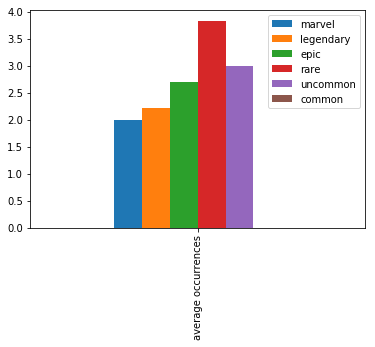

In [88]:
# What is the average occurrence rate for each rarity category?

# print(data['itemDetails'][0])
rarityOccurrences = {}
for item in data['itemDetails']:
    occurrencesCount = item['occurrences']['occurrences']
    for key, value in item.items():
        if key == 'rarity':
            if value in rarityOccurrences:
                rarityOccurrences[value].append(occurrencesCount)
            else:
                rarityOccurrences[value] = [occurrencesCount]

rarityAverage = {}
for key, value in rarityOccurrences.items():
    rarityAverage[key] = sum(value)/len(value)
print(rarityAverage)

rarityAverages = pd.DataFrame(rarityAverage, ['average occurrences'])
print(rarityAverages)
rarityAverages.plot(kind='bar')


In [32]:
# Occurrence rate of items
print('Occurrences')
itemFrame['occurrences'].value_counts()

Occurrences


0     636
3     119
2     118
4      72
5      64
6      59
7      59
1      57
8      41
9      29
10     22
12     14
11     12
13     10
14      8
15      4
16      4
23      4
18      3
21      3
25      3
17      2
19      2
22      2
30      2
34      1
20      1
24      1
28      1
32      1
42      1
Name: occurrences, dtype: int64

(array([1.002e+03, 2.230e+02, 7.700e+01, 2.600e+01, 8.000e+00, 1.300e+01,
        1.000e+00, 3.000e+00, 1.000e+00, 1.000e+00]),
 array([ 0. ,  4.2,  8.4, 12.6, 16.8, 21. , 25.2, 29.4, 33.6, 37.8, 42. ]),
 <a list of 10 Patch objects>)

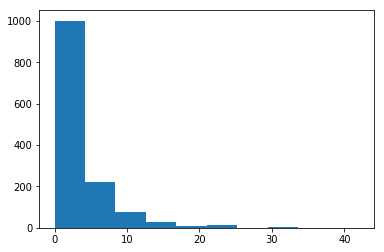

In [31]:
# Histogram of occurences. Are items generally rare (less-occurring) or common (more-occuring)?
plt.hist(itemFrame['occurrences'], bins=10)

In [29]:
print(data['itemDetails'][0])

{'identifier': '477f88c-eb310a8-234bcec-ccabb57', 'name': 'Black Widow Outfit', 'description': 'Whatever it takes.', 'cost': 1500, 'type': 'outfit', 'rarity': 'marvel', 'upcoming': 0, 'lastupdate': 1556323206, 'obtained': '1500', 'obtained_type': 'vbucks', 'todaystore': 0, 'images': {'transparent': 'https://fortnite-public-files.theapinetwork.com/outfit/c66dfd9c1fd49c4e28012294eaa1d779.png', 'background': 'https://fortnite-public-files.theapinetwork.com/image/477f88c-eb310a8-234bcec-ccabb57.png', 'information': 'https://fortnite-public-files.theapinetwork.com/image/477f88c-eb310a8-234bcec-ccabb57/item.png', 'featured': {'transparent': 'https://fortnite-public-files.theapinetwork.com/featured/477f88c-eb310a8-234bcec-ccabb57.png'}}, 'ratings': {'avgStars': 4.26, 'totalPoints': 1515, 'numberVotes': 356}, 'set': {'name': None, 'entries': None}, 'bundle': {'entries': []}, 'occurrences': {'first': '26-04-19', 'last': '27-04-19', 'occurrences': 2, 'entries': [{'date': '27-04-19', 'cost': 1500

In [30]:
jn = pd.io.json.json_normalize
result = jn(data['itemDetails'])
# reindex columns
result.reindex(columns=['name', 'occurrences.occurrences', 'rarity', 'cost'])

,name,occurrences.occurrences,rarity,cost
0,Black Widow Outfit,2,marvel,1500
1,Star-Lord Outfit,2,marvel,1500
2,The Milano,2,marvel,1200
3,Guardian Axe,2,marvel,500
4,Widow's Bite,2,marvel,800
5,Dance Off,2,marvel,500
6,Widow's Pirouette,2,marvel,200
7,Leviathan (BUNDLE),1,legendary,3740
8,Rex (BUNDLE),1,legendary,3740
9,Wukong (BUNDLE),1,legendary,4080
